In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set() 
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文显示 注：seaborn不推荐中文显示
plt.rcParams['axes.unicode_minus'] = False # 正确显示"负号"

In [2]:
data = pd.read_csv('consumer.csv')
data.head()

,入会时间,最近一次乘坐时间,乘坐次数,飞行里程,平均折扣
0,97.43,6.60,3,18770,0.66
1,97.43,3.80,24,35087,0.62
2,97.20,2.80,9,20660,0.52
3,93.03,1.00,12,23071,0.51
4,74.83,3.17,3,2897,0.95


In [3]:
pd.isnull(data).sum()

入会时间        0
最近一次乘坐时间    0
乘坐次数        0
飞行里程        0
平均折扣        0
dtype: int64

In [4]:
def minmax(ser):
    """
    输入series 进行最小最大化
    """
    ser = (ser - ser.min())/ (ser.max() - ser.min())
    return ser.astype(np.float64)
def zscore(ser):
    """
    输入Series 进行Z分数标准化
    """
    ser = (ser - ser.min())/ (ser.std())
    return ser.astype(np.float64)

In [5]:
dataz = pd.DataFrame()
for each in data.columns:
    dataz[each] = zscore(data[each])
dataz.head()

,入会时间,最近一次乘坐时间,乘坐次数,飞行里程,平均折扣
0,3.014854,1.085791,0.070869,0.874091,2.813550
1,3.014854,0.623049,1.559110,1.649145,2.597123
2,3.006715,0.457784,0.496080,0.963866,2.056055
3,2.859157,0.160307,0.708686,1.078388,2.001949
4,2.215139,0.518932,0.070869,0.120127,4.382644


In [6]:
def radar(df): # 雷达图
    """
    输入df
    df.index = "分类"
    df.columns = "要素" 
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    result = pd.concat([df, df.iloc[:,0]], axis=1)  # 闭合的 dataframe
    kind = list(result.index)
    
    angles = np.linspace(0, 2*np.pi, len(df.columns), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # 闭合的角度
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, polar=True) # 开启极坐标
    
    for i in kind:
        ax.plot(angles, result.loc[i,:], label=str(result.index[i]))
    
    plt.legend(loc='lower right')
    ax.set_thetagrids(angles * 180 / np.pi, df.columns)
    plt.title('rader-distribute')
    return plt

def kdeplus(data): # 多分类的KDE图
    
    cat_name = sorted(list(data['分类'].unique())) # 不同分类的名字 hue=
    for m in range(1, len(data.columns)):  #  特征对比图
        plt.subplot(2, 3, m)
        for each in cat_name:
            df = data.iloc[:,m-1][data['分类'] == each]
            count = data['分类'].value_counts()[each]
            label='分类'+ str(each)+'合计'+ str(count)+ '人'
            sns.kdeplot(df, label=label)
            plt.xlabel(data.columns[m-1])    

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [11]:
def km_fit(n_clusters,):
    measure_list = list(dataz.columns)
    measure_list.append('分类')
    km_clu = KMeans(n_clusters=n_clusters,tol=0.0000001,n_jobs=8)
    km_clu.fit(dataz)
    
    
    clu_res = pd.Series(km_clu.labels_)  # 输出类别array
    clu_centers= km_clu.cluster_centers_ # 输出聚类中心
    res_score = silhouette_score(X=dataz, labels=clu_res) # 轮廓系数
    
    cat_name = list(np.unique(clu_res)) # 输出类别

    res_data = pd.concat([dataz, clu_res], axis=1) # 特征+ 分类标签的矩阵
    res_data.columns = measure_list  
    res_center = pd.DataFrame(clu_centers,columns=measure_list[:-1]) #  聚类中心矩阵
    
#     if draw:
#         kdeplus(res_data)
#         radar(res_center)
    return res_data, res_center, res_score 

D:\Users\Yang\Anaconda3\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.2815074973078777


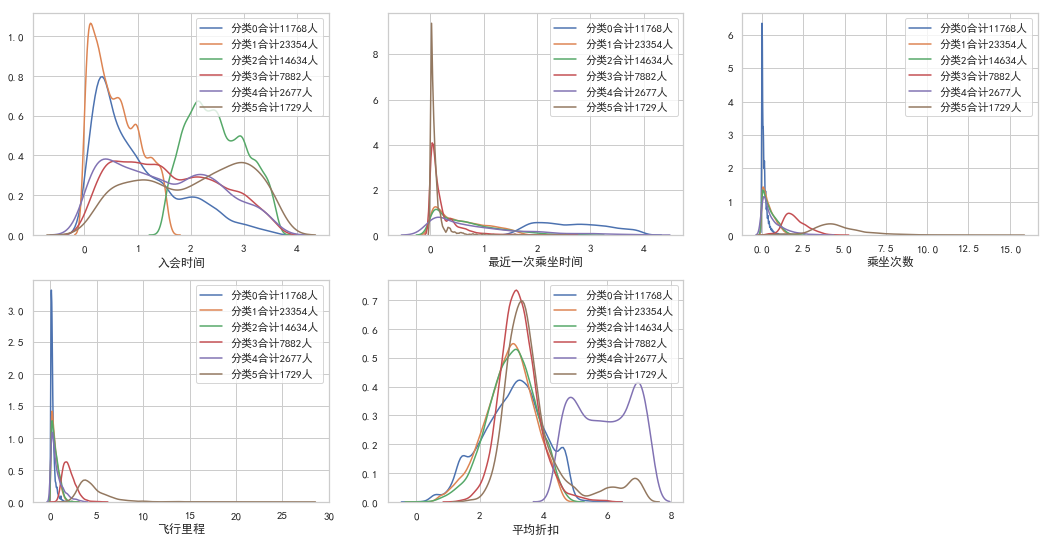

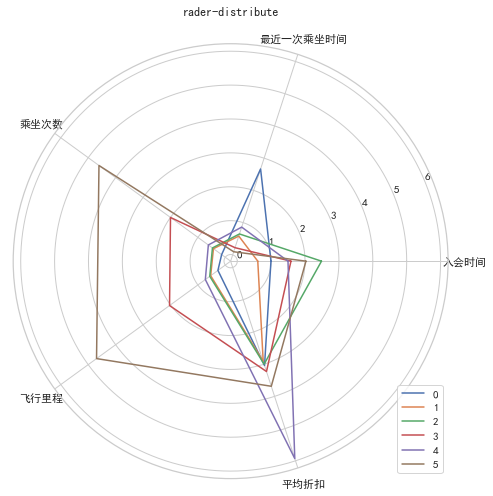

In [14]:
res_data, res_center, res_score = km_fit(6)
kdeplus(res_data)
radar(res_center)
print(res_score)

D:\Users\Yang\Anaconda3\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.37185155807987896


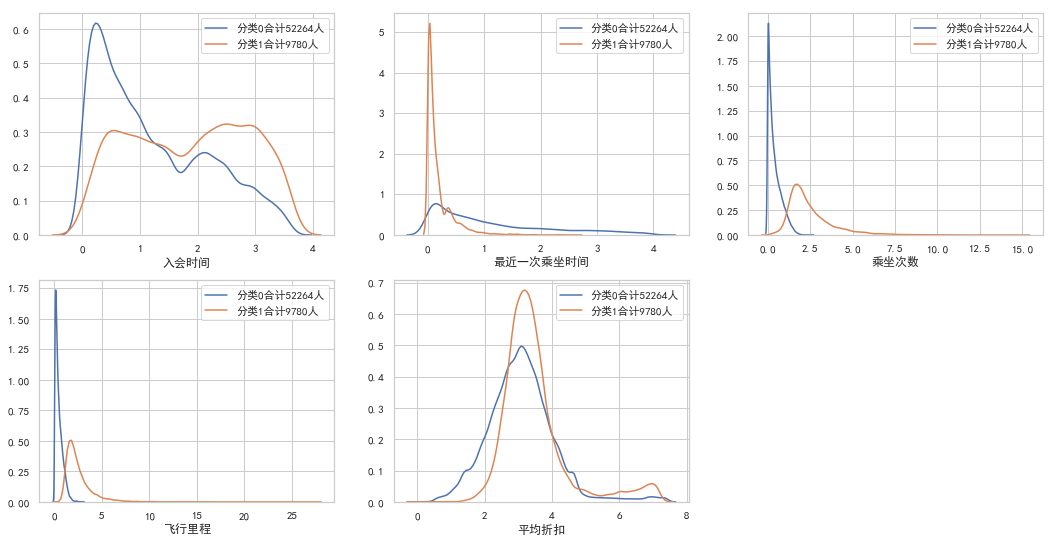

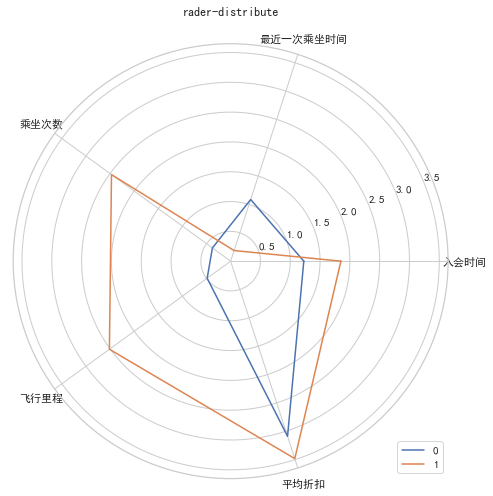

In [18]:
res_data, res_center, res_score = km_fit(2)
kdeplus(res_data)
radar(res_center)
print(res_score)

In [15]:
scores = []
for i in range(2,7):
    res_data, res_center, res_score = km_fit(i)
    scores.append(res_score)
print(scores)

[0.37030402222916053, 0.26718359018317805, 0.269525774014188, 0.277246483843504, 0.2815074973078777]


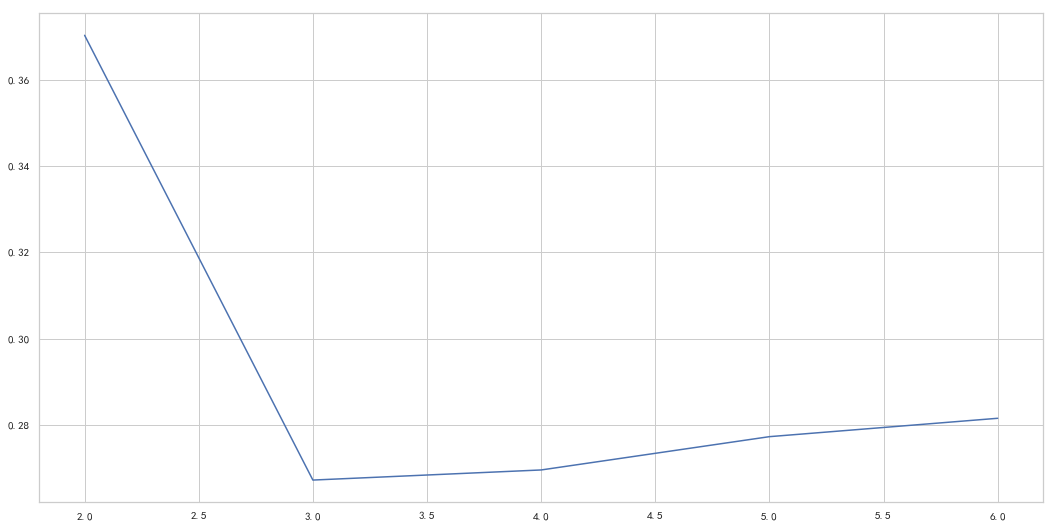

In [17]:
sns.lineplot(x=range(2,7), y=scores)

0.27737231758882014


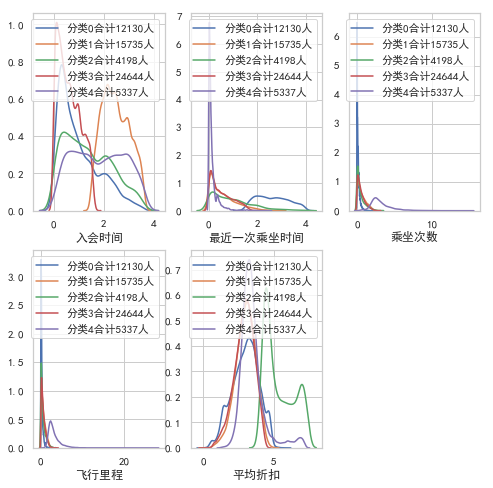

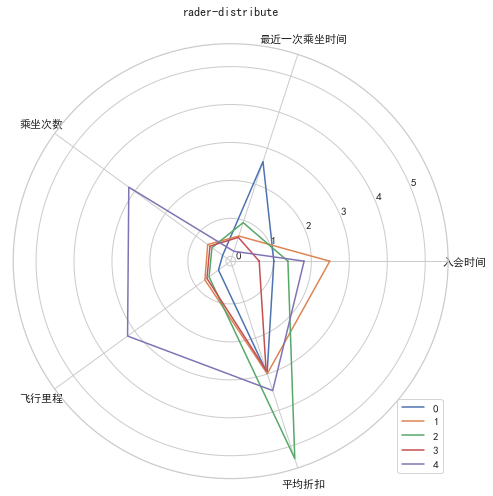

In [12]:
res_data, res_center, res_score = km_fit(5)
plt.figure(figsize=(8,8))
kdeplus(res_data)
radar(res_center)
print(res_score)

In [17]:
def db_fit(draw=False):
    measure_list = list(dataz.columns)
    measure_list.append('分类')
    db_clu = DBSCAN()
    db_clu.fit(dataz)
    
    
    db_clu_res = pd.Series(db_clu.labels_)  # 输出类别array
#     db_clu_centers= db_clu.cluster_centers_ # 输出聚类中心
    db_res_score = silhouette_score(X=dataz, labels=db_clu_res) # 轮廓系数
    
    db_cat_name = list(np.unique(db_clu_res)) # 输出类别

    db_res_data = pd.concat([dataz, db_clu_res], axis=1) # 特征+ 分类标签的矩阵
    db_res_data.columns = measure_list  
#     db_res_center = pd.DataFrame(db_clu_centers,columns=measure_list[:-1]) #  聚类中心矩阵
    
#     plt.style.use({'figure.figsize':(18,9)})
#     if draw:
#         kdeplus(res_data)
#         radar(res_center)
    return db_res_data,db_res_score 

In [19]:
db_res_data, db_res_score  = db_fit()